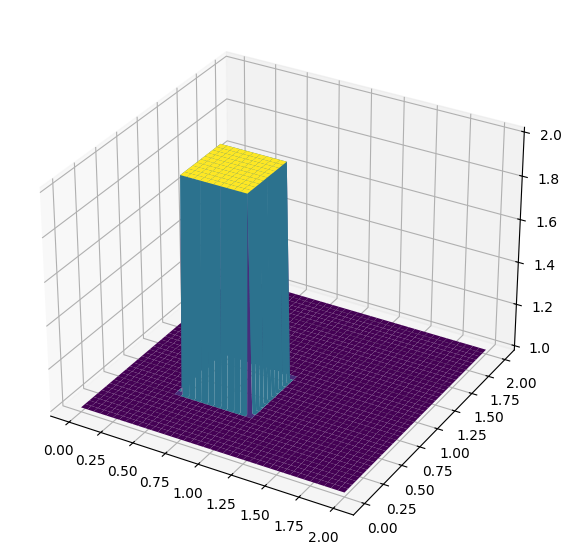

In [29]:
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from IPython import display
from IPython.display import HTML


#variable declaration

nx = 81
ny = 81
nt = 200
c = 1
dx = 2/(nx-1)
dy = 2/(ny-1)
sigma = 0.2
dt = sigma*dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny,nx))
un = np.ones((ny,nx))

#Initial Conditions
u[int(0.5/dy):int(1/dy + 1), int(0.5/ dx): int(1/dx+1)] = 2

fig = plt.figure(figsize = (11,7), dpi = 100)
ax = fig.add_subplot(projection = '3d')
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y, u[:], cmap = cm.viridis)

In [30]:
u

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [31]:
fig = plt.figure(figsize = (11,7), dpi = 100)
ax = fig.add_subplot(111, projection = '3d')
X, Y = np.meshgrid(x,y)
line = ax.plot_surface(X,Y, u[:])

def animate(frame):
    un = u.copy()
    #Array Operations
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) - (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0]= 1
    u[:,-1] = 1
    #Nested loop Operations
    # row, col = u.shape
    # for j in range(1,row):
    #     for i in range(1,col):
    #         u[j,i] = (un[j,i] - (c*dt/dx*(un[j,i] - un[j,i-1]))-(c*dt/dy*(un[j,i]-un[j-1,i])))
    #         u[0,:] = 1
    #         u[-1,:] = 1
    #         u[:,0]= 1
    #         u[:,-1] = 1
    ax.clear()
    line = ax.plot_surface(X,Y,u[:], cmap = cm.viridis)
    return line,

anim = FuncAnimation(fig, animate, frames = nt+1, interval = 20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()